In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

In [2]:
import sys
print(sys.version)
print(tf.__version__)

3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
2.9.1


In [3]:
data = pd.read_csv('data/cleaned_data.csv')
data.head(15)

,gender,age,weight,height,zs_weight_age,zs_height_age,zs_weight_height,totalzs_3,totalzs_percentage
0,male,35,10.08,86.08,-2.56,-2.52,-1.73,-2.270000,75.67
1,male,18,8.05,79.00,-2.53,-1.33,-2.65,-2.170000,72.33
2,female,46,12.02,93.07,-2.01,-1.96,-1.24,-1.736667,57.89
3,male,44,12.07,93.00,-1.90,-1.99,-1.16,-1.683333,56.11
4,male,46,18.07,101.00,1.13,-0.30,0.10,0.310000,10.33
5,male,15,9.08,74.05,-0.76,-1.95,0.30,-0.803333,26.78
6,female,43,10.10,92.00,-2.88,-1.97,-2.51,-2.453333,81.78
7,male,52,13.10,102.00,-1.79,-0.90,-1.95,-1.546667,51.56
8,female,36,11.10,88.00,-1.46,-1.92,-0.52,-1.300000,43.33
9,male,18,9.02,78.00,-1.81,-1.90,-1.26,-1.656667,55.22


In [4]:
gender_encoding = {'male': 1, 'female': 0}

# Doing label encoding using map method
data['gender'] = data['gender'].map(gender_encoding)

data.head()

,gender,age,weight,height,zs_weight_age,zs_height_age,zs_weight_height,totalzs_3,totalzs_percentage
0,1,35,10.08,86.08,-2.56,-2.52,-1.73,-2.270000,75.67
1,1,18,8.05,79.00,-2.53,-1.33,-2.65,-2.170000,72.33
2,0,46,12.02,93.07,-2.01,-1.96,-1.24,-1.736667,57.89
3,1,44,12.07,93.00,-1.90,-1.99,-1.16,-1.683333,56.11
4,1,46,18.07,101.00,1.13,-0.30,0.10,0.310000,10.33


In [46]:
feature = data.drop(columns=['zs_weight_age', 'zs_height_age', 'zs_weight_height', 'totalzs_3', 'totalzs_percentage'])
# Normalize the data
scaler = MinMaxScaler()
normalized = scaler.fit_transform(feature)

# Convert the normalized data back to a DataFrame
normalized_data = pd.DataFrame(normalized, columns=feature.columns)

# Save the normalization model using joblib
joblib.dump(scaler, 'normalization_model.joblib')

# Print the normalized DataFrame
print(normalized_data)

      gender       age    weight    height
0        1.0  0.583333  0.319405  0.607869
1        1.0  0.300000  0.237847  0.491803
2        0.0  0.766667  0.397348  0.722459
3        1.0  0.733333  0.399357  0.721311
4        1.0  0.766667  0.640418  0.852459
...      ...       ...       ...       ...
1042     1.0  0.666667  0.361591  0.704918
1043     0.0  0.633333  0.361189  0.690656
1044     0.0  0.533333  0.362395  0.657705
1045     1.0  0.600000  0.397348  0.722459
1046     1.0  0.000000  0.038971  0.016393

[1047 rows x 4 columns]


In [47]:
# Fitur
X = normalized_data
# Target
y = data[['zs_weight_age', 'zs_height_age', 'zs_weight_height', 'totalzs_3', 'totalzs_percentage']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [48]:
num_training_samples = len(X_train)
num_validation_samples = len(X_test)

print(f'Number of training samples: {num_training_samples}')
print(f'Number of validation samples: {num_validation_samples}')

Number of training samples: 837
Number of validation samples: 210


In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5)  
])

In [50]:
# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)  # Adjust learning rate
model.compile(optimizer=optimizer, loss=tf.keras.losses.MSE)

# Training model
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/1000
14/14 [==============================] - 1s 15ms/step - loss: 311.7377 - val_loss: 294.9513
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 304.8988 - val_loss: 285.6684
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 291.6949 - val_loss: 267.6849
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 267.7892 - val_loss: 238.0981
Epoch 5/1000
14/14 [==============================] - 0s 5ms/step - loss: 232.8064 - val_loss: 199.7802
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 193.2728 - val_loss: 168.1459
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 164.6705 - val_loss: 150.5013
Epoch 8/1000
14/14 [==============================] - 0s 5ms/step - loss: 146.4420 - val_loss: 132.8422
Epoch 9/1000
14/14 [==============================] - 0s 5ms/step - loss: 128.9111 - val_loss: 117.5270
Epoch 10/1000
14/14 [==============================] - 0s 15ms/

In [51]:
mse = model.evaluate(X_test, y_test, verbose=0)
print(f'DNN MSE: {mse:.2f}')

DNN MSE: 8.51


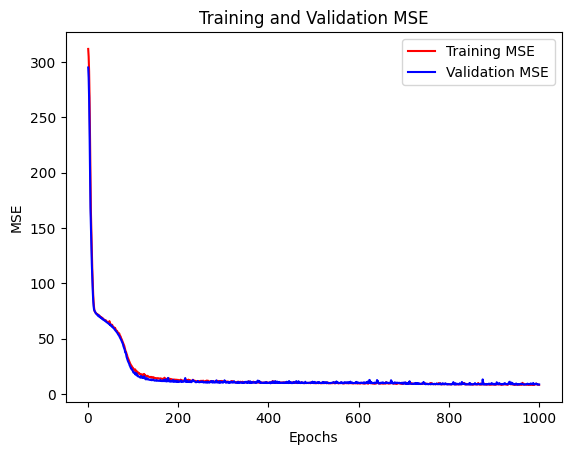

In [52]:
import matplotlib.pyplot as plt

# Ambil histori nilai loss dari objek history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot nilai loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Training MSE')
plt.plot(epochs, val_loss, 'b', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Tampilkan grafik
plt.show()

In [53]:
model_save_path = 'model.h5'
model.save(model_save_path)

print(f"Model Keras berhasil disimpan ke {model_save_path}")

Model Keras berhasil disimpan ke model.h5


In [55]:
import pathlib

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

optimization = tf.lite.Optimize.DEFAULT

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: saved_model/1\assets


9088

In [56]:
saved_model_dir = 'saved_model/1'

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()


In [58]:
tflite_model_path = 'model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

In [59]:
import json

# Muat model Keras dari file .h5
model = tf.keras.models.load_model('model.h5')

# Konversi arsitektur model ke format JSON
model_json = model.to_json()

# Simpan JSON ke dalam file
json_output_path = 'model.json'
with open(json_output_path, 'w') as json_file:
    json_file.write(model_json)

print(f"Model Keras berhasil dikonversi ke JSON dan disimpan di {json_output_path}")

Model Keras berhasil dikonversi ke JSON dan disimpan di model.json
